In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
train_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/train'

In [ ]:
valid_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/validation'

In [ ]:
test_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/test'

In [ ]:
img_width = 224
img_height = 224

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 1601 files belonging to 8 classes.


In [ ]:
classes = train_data.class_names

In [ ]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 480 files belonging to 8 classes.


In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 80 files belonging to 8 classes.


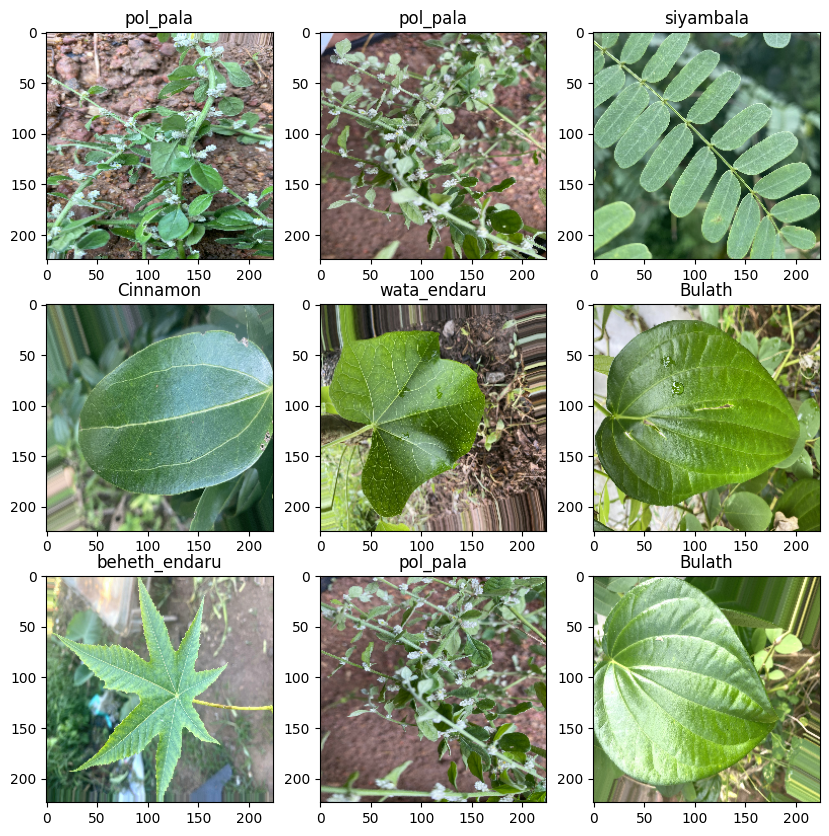

In [ ]:
plt.figure(figsize=(10,10))
for img, labels in train_data.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(classes[labels[i]])

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(256, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
epochs = 10
history = model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/10
161/161 [==============================] - 955s 6s/step - loss: 1.8131 - accuracy: 0.4022 - val_loss: 1.2496 - val_accuracy: 0.5063
Epoch 2/10
157/161 [============================>.] - ETA: 19s - loss: 0.8159 - accuracy: 0.6975

In [ ]:
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [ ]:
def predict_image(model, image):
  classes=train_data.class_names
  image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
  img_arr = tf.keras.utils.array_to_img(image)
  img_batch = tf.expand_dims(img_arr,0)
  predict = model.predict(img_batch)
  print('Leaf is of plant {} with an accuracy of {:0.2f}'.format(classes[np.argmax(predict)],np.max(predict)*100))

In [ ]:
image = 'IMG_1772.jpg'
predict_image(model, image)

In [ ]:
image = 'IMG_1876.jpg'
predict_image(model, image)

In [ ]:
test_data_2 = tf.keras.utils.image_dataset_from_directory(
    test_path_2,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

In [ ]:
model.save('LifeVeda_classifier.h5')